In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import imageio
import os

#Parameter combinations to test:
    #α=0,    N²=1e-6, M²=1e-6  Control (no strain) 
    #α=1e-6, N²=1e-6, M²=1e-6  Weak strain 
    #α=1e-5, N²=1e-6, M²=1e-6 Moderate strain (paper-like) 
    #α=1e-5, N²=1e-5, M²=1e-6 Strong stratification done
    #α=1e-5, N²=1e-6, M²=1e-5 Weaker front
    #α=1e-5, N²= 0 , M²=1e-6  Zero PV case to compare with ST13
    #α=1e-5, N²= 1e-3 , M²=1e-6  Explodes!
    
    #α=0, N²= 0 , M²=9e-6  B00 case


# File naming convention: filename = "front_α=(α)_N²=(N²)_M²=(M²).nc"
filename = 'run_Ro=3_δ=0_F=22.nc'
ds = xr.open_dataset(filename, engine = 'netcdf4', decode_times=False)


## Non-dimensionalising timescale

In [2]:
f = 1e-4

# Rescale time: convert seconds to non-dimensional time = f * t
# Ensure 'time' is in seconds (if it's in days, convert to seconds first)
time_in_seconds = ds.time.values.astype('timedelta64[s]').astype(float)
nondim_time = f * time_in_seconds


# Add non-dimensional time to dataset for convenience
ds = ds.assign_coords(nondim_time=("time", nondim_time))

In [ ]:
b = ds['b']
x = ds['x_caa'].values / 1e3  # convert to km
z = ds['z_aac'].values
time_values = ds['time'].values

# === Prepare a folder for frames ===
os.makedirs("frames", exist_ok=True)

# === Create frames ===
images = []
for i in range(len(time_values)):
    plt.figure(figsize=(8, 4))
    ax = plt.gca()

    # Get 2D buoyancy data at time i
    b_data = b.isel(time=i ).values

    # Filled color map
    pc = ax.pcolormesh(x, z, b_data, shading='auto', cmap='RdBu_r',
                       vmin=float(b.min()), vmax=float(b.max()))
    plt.colorbar(pc, ax=ax, label="b (m/s²)")

    # Contour lines
    contour_levels = 10  # or use a list like [-1e-4, -5e-5, 0, 5e-5, 1e-4]
    cs = ax.contour(x, z, b_data, levels=contour_levels, colors='black', linewidths=0.5)
    #ax.clabel(cs, inline=True, fontsize=6, fmt="%.0e")

    # Title and labels
    plt.title(f"Time = {time_values[i]/86400:.2f}")
    ax.set_xlabel("x (km)")
    ax.set_ylabel("z (m)")
    ax.set_xlim(-100, 100) #comment this out to change width of animation
    #ax.axvline(-x.max() + 2*x.max()/10 ) # left sponge layer. (note the factor of 2 becuase x.max() is Lx/2)
    #ax.axvline(x.max - 2*x.max()) #right sponge layer
    
    # Save frame
    frame_path = f"frames/frame_{i:04d}.png"
    plt.savefig(frame_path, dpi=150)
    images.append(imageio.imread(frame_path))
    plt.close()

# === Save as animation ===
imageio.mimsave(filename + '_animation.mp4', images, fps=5)

print("✅ Animation saved as 'buoyancy_animation.mp4' with buoyancy contours.")


C:\Users\Tom Cummings\AppData\Local\Temp\ipykernel_26480\2858507773.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(frame_path))
C:\Users\Tom Cummings\AppData\Local\Temp\ipykernel_26480\2858507773.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(frame_path))
C:\Users\Tom Cummings\AppData\Local\Temp\ipykernel_26480\2858507773.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import i

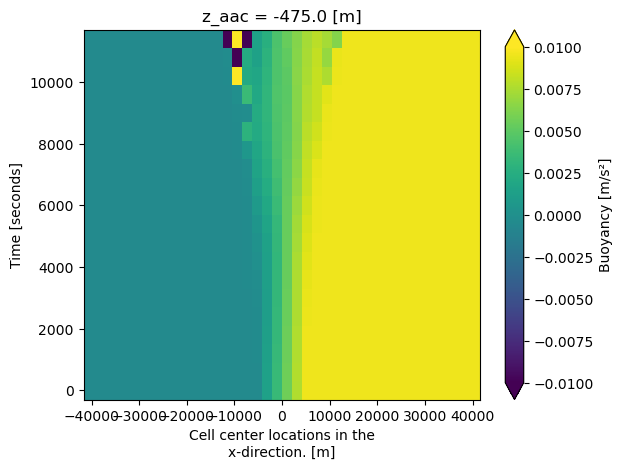

In [ ]:
ds.b[:20,10,100:140].plot(vmin = -0.01, vmax = 0.01)

In [3]:
ds

<xarray.Dataset> Size: 141MB
Dimensions:  (x_caa: 240, x_faa: 241, z_aac: 20, z_aaf: 21, time: 1441)
Coordinates:
  * time     (time) float64 12kB 0.0 600.0 1.2e+03 ... 8.634e+05 8.64e+05
  * x_faa    (x_faa) float32 964B -2.5e+05 -2.479e+05 ... 2.479e+05 2.5e+05
  * x_caa    (x_caa) float32 960B -2.49e+05 -2.469e+05 ... 2.469e+05 2.49e+05
  * z_aaf    (z_aaf) float32 84B -1.0 -0.95 -0.9 -0.85 ... -0.15 -0.1 -0.05 0.0
  * z_aac    (z_aac) float32 80B -0.975 -0.925 -0.875 ... -0.125 -0.075 -0.025
Data variables:
    Δx_caa   (x_caa) float32 960B ...
    Δx_faa   (x_faa) float32 964B ...
    Δz_aac   (z_aac) float32 80B ...
    Δz_aaf   (z_aaf) float32 84B ...
    b        (time, z_aac, x_caa) float32 28MB ...
    u        (time, z_aac, x_faa) float32 28MB ...
    v        (time, z_aac, x_caa) float32 28MB ...
    w        (time, z_aaf, x_caa) float32 29MB ...
    ζ        (time, z_aaf, x_faa) float32 29MB ...
Attributes:
    Julia:                 This file was generated using Julia Version 1.11.5...
    Oceananigans:          This file was generated using Oceananigans v0.96.35
    date:                  This file was generated on 2025-07-17T15:55:39.304...
    interval:              600.0
    output time interval:  Output was saved every 10 minutes.
    schedule:              TimeInterval